In [3]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx
LOCAL_DATA_PATH = '/local/home/jthomm/visual-genome/'
import json
# you need to download the scene graph data from visual genome, it's not included in dario's folder (and i don't have write access there)
with open(LOCAL_DATA_PATH+'scene_graphs.json', 'r') as f:
    scene_graphs_dict = json.load(f)

def build_graph(g_dict):
        G = nx.DiGraph(image_id=g_dict['image_id'])
        G.labels = {}
        for obj in g_dict['objects']:
            G.add_node(obj['object_id'], w=obj['w'], h=obj['h'], x=obj['x'], y=obj['y'], attributes=obj.get('attributes',[]), name=obj['names'][0])
            G.labels[obj['object_id']] = obj['names'][0]
        for rel in g_dict['relationships']:
            G.add_edge(rel['subject_id'], rel['object_id'], synsets=rel['synsets'] ,relationship_id=rel['relationship_id'], predicate=rel['predicate'])
        return G
graphs = [] 
for g_dict in tqdm(scene_graphs_dict):
    graphs.append(build_graph(g_dict))

100%|██████████| 108077/108077 [00:18<00:00, 5946.81it/s]


In [8]:
def plot_graph(g):
    pos = nx.nx_agraph.graphviz_layout(g, prog="dot")
    max_y = max([y for x,y in pos.values()])
    n_nodes_top = len([n for n in g.nodes if pos[n][1] == max_y])
    longest_label = max([len(g.labels[n]) for n in g.nodes])
    plt.figure(figsize=(max(n_nodes_top*longest_label/10,15),5))
    nx.draw(g,pos=pos, with_labels=True, node_size=10, node_color="lightgray", font_size=8)
    nx.draw_networkx_edge_labels(g,pos=pos,edge_labels=nx.get_edge_attributes(g,'predicate'),font_size=8)
    plt.show()

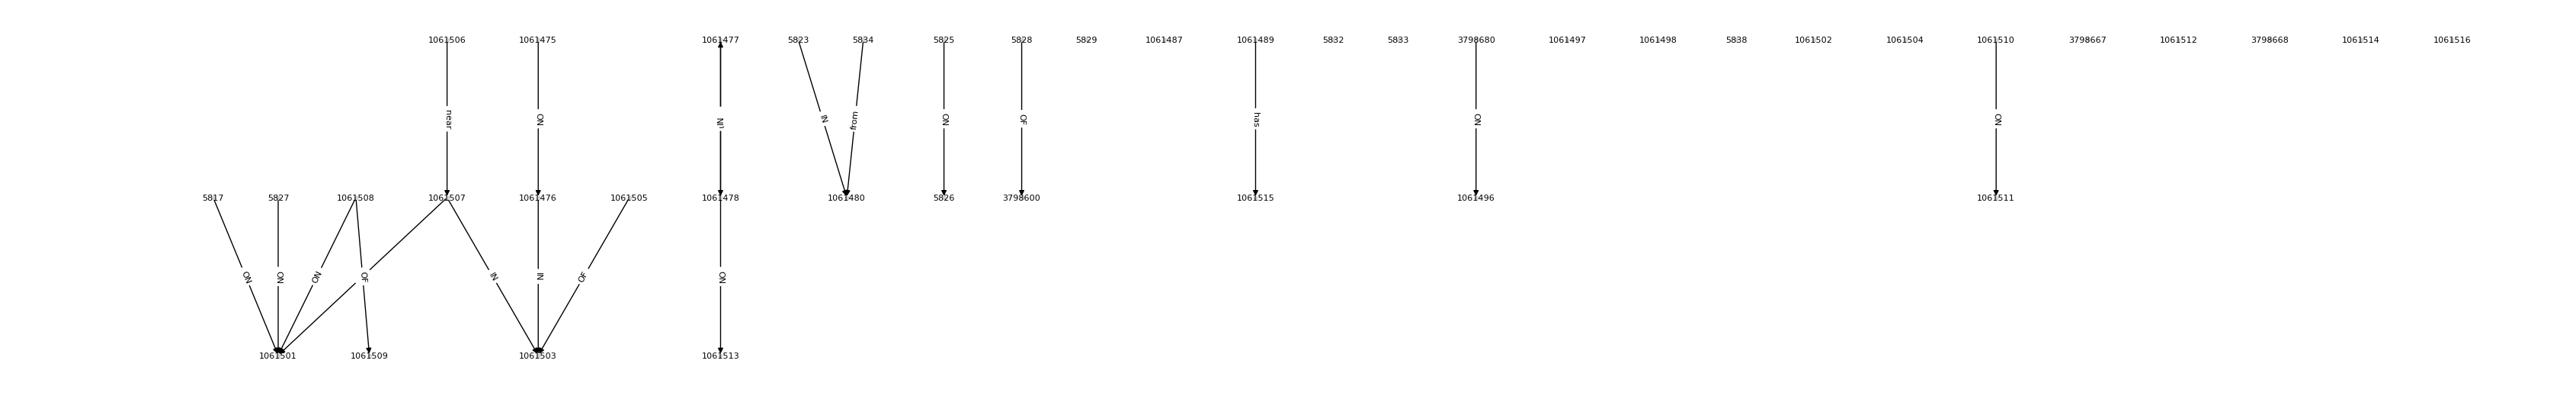

[[1061475, 1061476, 1061503], [1061477, 1061478, 1061513], [1061506, 1061507, 1061503], [1061506, 1061507, 1061501]]


In [17]:
g = graphs[35]
def get_all_paths(g, max_length):
    paths = [[n] for n in g.nodes]
    for _ in range(max_length):
        new_paths = []
        for path in paths:
            for n in g.successors(path[-1]):
                if n not in path: # the graphs actually have cycles, so we need to check for that
                    new_paths.append(path+[n])
        if len(new_paths) == 0:
            break
        paths = new_paths
    return paths

plot_graph(g)
print(get_all_paths(g, 5))


